# GitHub Stats for FLORIS
This notebook is used to connect to the GitHub stats database for the FLORIS repo to extract and visualize data



In [1]:
# add path above this notebook
import sys
sys.path.append("..") 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import dateutil

In [2]:
# import database
import database as dbc

In [3]:
# connect to the database

db = dbc.Database()

/Users/pfleming/anaconda3/lib/python3.6/site-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [4]:
# retrieve data in the following range
# timestamps in format YYYY-MM-DD
from_date = '2018-01-01'
to_date = datetime.datetime.today().strftime('%Y-%m-%d') # set to today


In [5]:
print("FROM DATE: " + from_date)
print("TO DATE: " + to_date)

FROM DATE: 2018-01-01
TO DATE: 2019-09-06


In [6]:
results_wisdem = db.getResults(from_date, to_date, repo_code='wisdem_floris')
results_nrel_floris = db.getResults(from_date, to_date, repo_code='nrel_floris')
results_wfc_tools = db.getResults(from_date, to_date, repo_code='wfc_tools')

In [7]:
# Mix together
df_1 = pd.DataFrame(results_wisdem)
df_1['repo'] = 'floris_wisdem'
df_2 = pd.DataFrame(results_nrel_floris)
df_2['repo'] = 'floris_nrel'
df_3 = pd.DataFrame(results_wfc_tools)
df_3['repo'] = 'wfc_tools'

df = df_1.append(df_2).append(df_3)
df['timestamp'] = pd.to_datetime(df.timestamp)

/Users/pfleming/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [8]:
# Mix together with 1 week resampling
df_1 = pd.DataFrame(results_wisdem)
df_1['timestamp'] = pd.to_datetime(df_1.timestamp)
df_1 = df_1.resample('7D', on='timestamp').sum().reset_index()
df_1['repo'] = 'floris_wisdem'

df_2 = pd.DataFrame(results_nrel_floris)
df_2['timestamp'] = pd.to_datetime(df_2.timestamp)
df_2 = df_2.resample('7D', on='timestamp').sum().reset_index()
df_2['repo'] = 'floris_nrel'

df_3 = pd.DataFrame(results_wfc_tools)
df_3['timestamp'] = pd.to_datetime(df_3.timestamp)
df_3 = df_3.resample('7D', on='timestamp').sum().reset_index()
df_3['repo'] = 'wfc_tools'

df = df_1.append(df_2).append(df_3)
df['timestamp'] = pd.to_datetime(df.timestamp)

/Users/pfleming/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [9]:
# Melt the data for dope plotting
df_melt = pd.melt(df,id_vars=['repo','timestamp'])
df_melt = df_melt.sort_values(['timestamp'])
df_melt.head()

,repo,timestamp,variable,value
0,floris_wisdem,2019-01-05,clones_total,9.0
198,floris_wisdem,2019-01-05,views_uniques,32.0
66,floris_wisdem,2019-01-05,clones_uniques,8.0
132,floris_wisdem,2019-01-05,views_total,109.0
133,floris_wisdem,2019-01-12,views_total,210.0


/Users/pfleming/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/pfleming/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


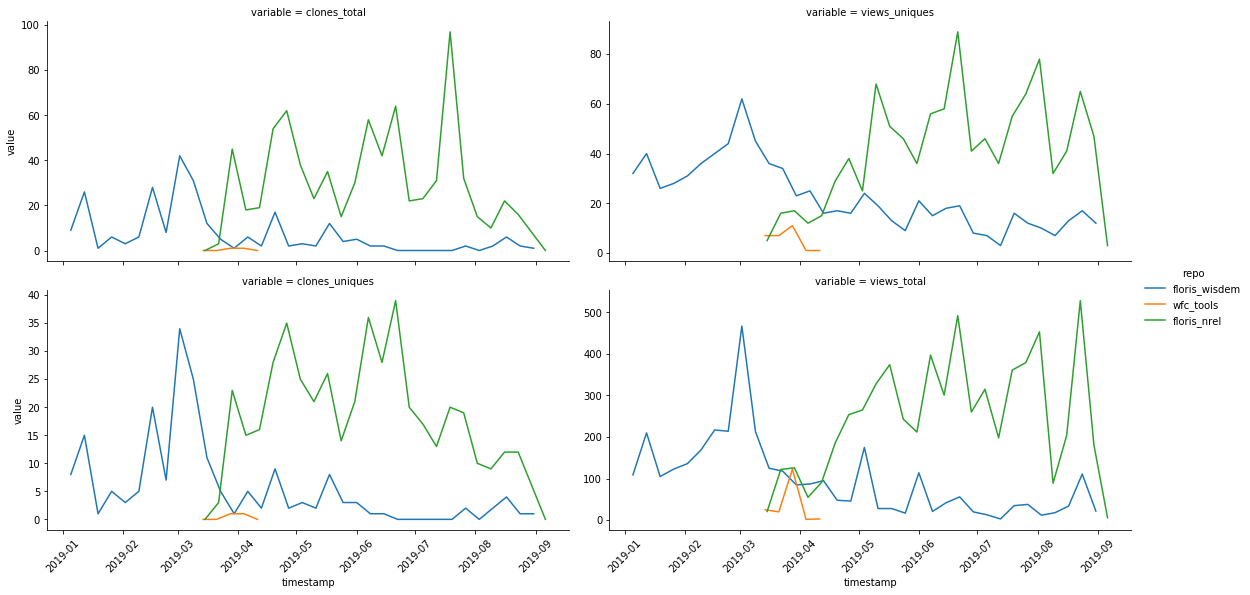

In [10]:
# Dope plots
g = sns.FacetGrid(df_melt,col='variable',col_wrap=2,hue='repo',size=4,sharey=False,aspect=2)
g.map(plt.plot,'timestamp','value')
g.add_legend()
g.set_xticklabels(rotation=45)

In [11]:
# Weekly resample
df_melt_2 = df_melt.set_index(['repo','variable'])
df_melt_2 = df_melt_2.resample('7D',on='timestamp').mean()


df_melt_2

,value
timestamp,
2019-01-05,39.500000
2019-01-12,72.750000
2019-01-19,33.250000
2019-01-26,40.500000
2019-02-02,43.250000
2019-02-09,54.000000
2019-02-16,76.250000
2019-02-23,68.250000
2019-03-02,151.250000


In [12]:
# Reformulate as rolling
# Mix together
df_1 = pd.DataFrame(results_wisdem).fillna(0).sort_values(['timestamp'])
df_1 = df_1.set_index('timestamp').cumsum().reset_index()
df_1['repo'] = 'floris_wisdem'
df_2 = pd.DataFrame(results_nrel_floris).fillna(0).sort_values(['timestamp'])
df_2 = df_2.set_index('timestamp').cumsum().reset_index()
df_2['repo'] = 'floris_nrel'
df_3 = pd.DataFrame(results_wfc_tools).fillna(0).sort_values(['timestamp'])
df_3 = df_3.set_index('timestamp').cumsum().reset_index()
df_3['repo'] = 'wfc_tools'

df = df_1.append(df_2).append(df_3)
df['timestamp'] = pd.to_datetime(df.timestamp)

/Users/pfleming/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:7116: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [13]:
# Melt the data for dope plotting
df_melt = pd.melt(df,id_vars=['repo','timestamp'])
df_melt = df_melt.sort_values(['timestamp'])

/Users/pfleming/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


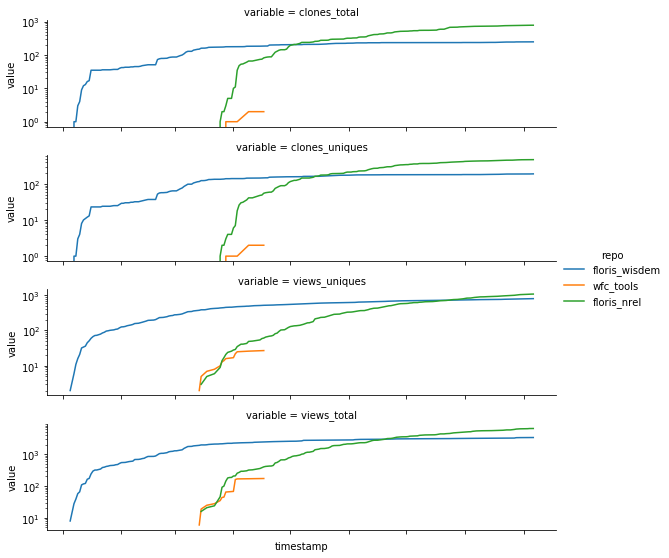

In [14]:
# Dope plots
df_melt['timestamp'] = pd.to_datetime(df_melt.timestamp)
g = sns.FacetGrid(df_melt,row='variable',hue='repo',size=2,sharey=False,aspect=4)
g.map(plt.semilogy,'timestamp','value')
g.add_legend()
g.set_xticklabels(rotation=30)

In [19]:
df_sub = df_melt[df_melt.repo=='floris_nrel']
df_sub = df_sub[df_sub.variable.isin(['clones_total','clones_uniques'])]
df_sub

,repo,timestamp,variable,value
595,floris_nrel,2019-03-15,clones_uniques,0.0
212,floris_nrel,2019-03-15,clones_total,0.0
596,floris_nrel,2019-03-18,clones_uniques,0.0
213,floris_nrel,2019-03-18,clones_total,0.0
597,floris_nrel,2019-03-22,clones_uniques,0.0
214,floris_nrel,2019-03-22,clones_total,0.0
215,floris_nrel,2019-03-25,clones_total,1.0
598,floris_nrel,2019-03-25,clones_uniques,1.0
216,floris_nrel,2019-03-26,clones_total,2.0
599,floris_nrel,2019-03-26,clones_uniques,2.0


/Users/pfleming/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


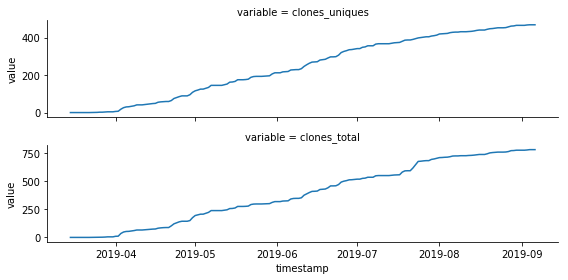

In [22]:
# Dope plots
df_melt['timestamp'] = pd.to_datetime(df_melt.timestamp)
df_sub = df_melt[df_melt.repo=='floris_nrel']
df_sub = df_sub[df_sub.variable.isin(['clones_total','clones_uniques'])]
g = sns.FacetGrid(df_sub,row='variable',hue='repo',size=2,sharey=False,aspect=4)
g.map(plt.plot,'timestamp','value')
# g.add_legend()
# g.set_xticklabels(rotation=30)

## TOTAL COUNTS

In [10]:
# Get total counts for all time recorded
totals = db.getTotals()
print(totals)

GETTING TOTAL UNIQUE VIEWS AND CLONES
   total_unique_clones  total_unique_views  from_date    to_date
0                   39                 222 2019-01-05 2019-02-20
